# World Economic Report
## Analysis Using World Bank Data from 1960-2018

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Settings
pd.set_option("display.max_columns", None)
mpl.rcParams["font.family"] = "Sans"

## Prepare & QA the Data

In [4]:
# Load world bank data
world_bank = pd.read_excel("data/WorldBank.xlsx")

world_bank.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [5]:
# Calculate population 
world_bank["Population (M)"] = (world_bank.loc[:,"GDP (USD)"] / world_bank.loc[:, "GDP per capita (USD)"]) / 1_000_000
world_bank.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [6]:
# Check data types and memory usage
world_bank.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [7]:
# Review missing values as % of total df
world_bank.isna().sum() / world_bank.shape[0]

Country Name                                                    0.000000
Country Code                                                    0.000000
Region                                                          0.000000
IncomeGroup                                                     0.000000
Year                                                            0.000000
Birth rate, crude (per 1,000 people)                            0.081051
Death rate, crude (per 1,000 people)                            0.082979
Electric power consumption (kWh per capita)                     0.530243
GDP (USD)                                                       0.230621
GDP per capita (USD)                                            0.230862
Individuals using the Internet (% of population)                0.593220
Infant mortality rate (per 1,000 live births)                   0.198008
Life expectancy at birth (years)                                0.102257
Population density (people per sq. km of land area)

In [8]:
world_bank.describe().round()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
count,12449.0,11440.0,11416.0,5848.0,9.578000e+03,9575.0,5064.0,9984.0,11176.0,11845.0,5208.0,9575.0
mean,1989.0,29.0,11.0,3175.0,1.700740e+11,8232.0,23.0,52.0,64.0,319.0,8.0,30.0
std,17.0,13.0,5.0,4467.0,8.979866e+11,16174.0,28.0,46.0,11.0,1593.0,6.0,116.0
min,1960.0,7.0,1.0,0.0,8.824450e+06,35.0,0.0,1.0,19.0,0.0,0.0,0.0
25%,1974.0,17.0,7.0,390.0,1.393010e+09,513.0,1.0,14.0,56.0,20.0,4.0,1.0
50%,1989.0,28.0,9.0,1542.0,7.275305e+09,1853.0,8.0,37.0,67.0,64.0,7.0,5.0
75%,2004.0,41.0,13.0,4314.0,4.857782e+10,7775.0,41.0,78.0,73.0,145.0,11.0,17.0
max,2018.0,58.0,54.0,54799.0,2.050000e+13,189171.0,100.0,279.0,85.0,21389.0,38.0,1392.0


In [9]:
# Filter to include only rows for 2014
world_bank_2014 = world_bank.query("Year == 2014")
world_bank_2014.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856
63,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092
122,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249
181,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791
240,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213


In [10]:
# Load HDI table
hdi = pd.read_csv("data/HDI.csv")
hdi.head()

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,hdi_1999,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005,hdi_2006,hdi_2007,hdi_2008,hdi_2009,hdi_2010,hdi_2011,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,le_1990,le_1991,le_1992,le_1993,le_1994,le_1995,le_1996,le_1997,le_1998,le_1999,le_2000,le_2001,le_2002,le_2003,le_2004,le_2005,le_2006,le_2007,le_2008,le_2009,le_2010,le_2011,le_2012,le_2013,le_2014,le_2015,le_2016,le_2017,le_2018,le_2019,le_2020,le_2021,eys_1990,eys_1991,eys_1992,eys_1993,eys_1994,eys_1995,eys_1996,eys_1997,eys_1998,eys_1999,eys_2000,eys_2001,eys_2002,eys_2003,eys_2004,eys_2005,eys_2006,eys_2007,eys_2008,eys_2009,eys_2010,eys_2011,eys_2012,eys_2013,eys_2014,eys_2015,eys_2016,eys_2017,eys_2018,eys_2019,eys_2020,eys_2021,mys_1990,mys_1991,mys_1992,mys_1993,mys_1994,mys_1995,mys_1996,mys_1997,mys_1998,mys_1999,mys_2000,mys_2001,mys_2002,mys_2003,mys_2004,mys_2005,mys_2006,mys_2007,mys_2008,mys_2009,mys_2010,mys_2011,mys_2012,mys_2013,mys_2014,mys_2015,mys_2016,mys_2017,mys_2018,mys_2019,mys_2020,mys_2021,gnipc_1990,gnipc_1991,gnipc_1992,gnipc_1993,gnipc_1994,gnipc_1995,gnipc_1996,gnipc_1997,gnipc_1998,gnipc_1999,gnipc_2000,gnipc_2001,gnipc_2002,gnipc_2003,gnipc_2004,gnipc_2005,gnipc_2006,gnipc_2007,gnipc_2008,gnipc_2009,gnipc_2010,gnipc_2011,gnipc_2012,gnipc_2013,gnipc_2014,gnipc_2015,gnipc_2016,gnipc_2017,gnipc_2018,gnipc_2019,gnipc_2020,gnipc_2021,gdi_group_2021,gdi_1990,gdi_1991,gdi_1992,gdi_1993,gdi_1994,gdi_1995,gdi_1996,gdi_1997,gdi_1998,gdi_1999,gdi_2000,gdi_2001,gdi_2002,gdi_2003,gdi_2004,gdi_2005,gdi_2006,gdi_2007,gdi_2008,gdi_2009,gdi_2010,gdi_2011,gdi_2012,gdi_2013,gdi_2014,gdi_2015,gdi_2016,gdi_2017,gdi_2018,gdi_2019,gdi_2020,gdi_2021,hdi_f_1990,hdi_f_1991,hdi_f_1992,hdi_f_1993,hdi_f_1994,hdi_f_1995,hdi_f_1996,hdi_f_1997,hdi_f_1998,hdi_f_1999,hdi_f_2000,hdi_f_2001,hdi_f_2002,hdi_f_2003,hdi_f_2004,hdi_f_2005,hdi_f_2006,hdi_f_2007,hdi_f_2008,hdi_f_2009,hdi_f_2010,hdi_f_2011,hdi_f_2012,hdi_f_2013,hdi_f_2014,hdi_f_2015,hdi_f_2016,hdi_f_2017,hdi_f_2018,hdi_f_2019,hdi_f_2020,hdi_f_2021,le_f_1990,le_f_1991,le_f_1992,le_f_1993,le_f_1994,le_f_1995,le_f_1996,le_f_1997,le_f_1998,le_f_1999,le_f_2000,le_f_2001,le_f_2002,le_f_2003,le_f_2004,le_f_2005,le_f_2006,le_f_2007,le_f_2008,le_f_2009,le_f_2010,le_f_2011,le_f_2012,le_f_2013,le_f_2014,le_f_2015,le_f_2016,le_f_2017,le_f_2018,le_f_2019,le_f_2020,le_f_2021,eys_f_1990,eys_f_1991,eys_f_1992,eys_f_1993,eys_f_1994,eys_f_1995,eys_f_1996,eys_f_1997,eys_f_1998,eys_f_1999,eys_f_2000,eys_f_2001,eys_f_2002,eys_f_2003,eys_f_2004,eys_f_2005,eys_f_2006,eys_f_2007,eys_f_2008,eys_f_2009,eys_f_2010,eys_f_2011,eys_f_2012,eys_f_2013,eys_f_2014,eys_f_2015,eys_f_2016,eys_f_2017,eys_f_2018,eys_f_2019,eys_f_2020,eys_f_2021,mys_f_1990,mys_f_1991,mys_f_1992,mys_f_1993,mys_f_1994,mys_f_1995,mys_f_1996,mys_f_1997,mys_f_1998,mys_f_1999,mys_f_2000,mys_f_2001,mys_f_2002,mys_f_2003,mys_f_2004,mys_f_2005,mys_f_2006,mys_f_2007,mys_f_2008,mys_f_2009,mys_f_2010,mys_f_2011,mys_f_2012,mys_f_2013,mys_f_2014,mys_f_2015,mys_f_2016,mys_f_2017,mys_f_2018,mys_f_2019,mys_f_2020,mys_f_2021,gni_pc_f_1990,gni_pc_f_1991,gni_pc_f_1992,gni_pc_f_1993,gni_pc_f_1994,gni_pc_f_1995,gni_pc_f_1996,gni_pc_f_1997,gni_pc_f_1998,gni_pc_f_1999,gni_pc_f_2000,gni_pc_f_2001,gni_pc_f_2002,gni_pc_f_2003,gni_pc_f_2004,gni_pc_f_2005,gni_pc_f_2006,gni_pc_f_2007,gni_pc_f_2008,gni_pc_f_2009,gni_pc_f_2010,gni_pc_f_2011,gni_pc_f_2012,gni_pc_f_2013,gni_pc_f_2014,gni_pc_f_2015,gni_pc_f_2016,gni_pc_f_2017,gni_pc_f_2018,gni_pc_f_2019,gni_pc_f_2020,gni_pc_f_2021,hdi_m_1990,hdi_m_1991,hdi_m_1992,hdi_m_1993,hdi_m_1994,hdi_m_1995,hdi_m_1996,hdi_m_1997,hdi_m_1998,hdi_m_1999,hdi_m_2000,hdi_m_2001,hdi_m_2002,hdi_m_2003,hdi_m_2004,hdi_m_2005,hdi_m_2006,hdi_m_2007,hdi_m_2008,hdi_m_2009,hdi_m_2010,hdi_m_2011,hdi_m_2012,hdi_m_2013,hdi_m_2014,hdi_m_2015,hdi_m_2016,hdi_m_2017,hdi_m_2018,hdi_m_2019,hdi_m_2020,hdi_m_2021,le_m_1

In [11]:
# Join 2014 data with the HDI table
world_bank_hdi_2014 = world_bank_2014.merge(hdi.loc[:,["iso3", "hdi_2014"]],
                     how="left",
                     left_on="Country Code",
                     right_on="iso3")
world_bank_hdi_2014.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


In [12]:
world_bank_hdi_2014.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  211 non-null    object 
 1   Country Code                                                  211 non-null    object 
 2   Region                                                        211 non-null    object 
 3   IncomeGroup                                                   211 non-null    object 
 4   Year                                                          211 non-null    int64  
 5   Birth rate, crude (per 1,000 people)                          204 non-null    float64
 6   Death rate, crude (per 1,000 people)                          204 non-null    float64
 7   Electric power consumption (kWh per capita)                   139 non-n

In [13]:
# Review missing values as % of total df
world_bank_hdi_2014.isna().sum() / world_bank_hdi_2014.shape[0]

Country Name                                                    0.000000
Country Code                                                    0.000000
Region                                                          0.000000
IncomeGroup                                                     0.000000
Year                                                            0.000000
Birth rate, crude (per 1,000 people)                            0.033175
Death rate, crude (per 1,000 people)                            0.033175
Electric power consumption (kWh per capita)                     0.341232
GDP (USD)                                                       0.047393
GDP per capita (USD)                                            0.047393
Individuals using the Internet (% of population)                0.056872
Infant mortality rate (per 1,000 live births)                   0.099526
Life expectancy at birth (years)                                0.066351
Population density (people per sq. km of land area)

## Prepare the data for visualization

In [15]:
gdp_pivot = world_bank.pivot_table(index="Year",
                                columns="Region",
                                values="GDP (USD)",
                                aggfunc="sum")
gdp_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [16]:
pop_pivot = world_bank.pivot_table(index="Year",
                                columns="Region",
                                values="Population (M)",
                                aggfunc="sum")
pop_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.149068,280.746688,186.852628,59.303286,180.615844,572.526561,168.518542
1961,871.192827,283.656647,192.312725,60.945298,201.909874,584.618194,172.577530
1962,881.036241,286.741448,219.093142,62.667579,205.167974,597.165027,177.066655
1963,902.065879,289.789614,225.199250,64.416446,208.372005,610.162283,181.468995
1964,922.572657,292.833206,231.411905,66.231025,211.318874,623.598506,186.049084


In [17]:
wb_hdi_by_region = (world_bank_hdi_2014
     .groupby("Region")
     .agg(avg_hdi=("hdi_2014", "mean"))
     .sort_values("avg_hdi", ascending=False)
)

wb_hdi_by_region

,avg_hdi
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963
South Asia,0.611125
Sub-Saharan Africa,0.527745


## Visualize the data
### Make initial graphs for eventual integration into a one-page infographic

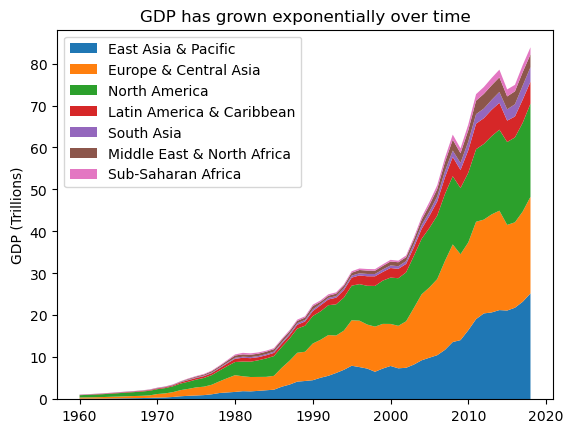

In [19]:
fig, ax = plt.subplots()

ax.stackplot(gdp_pivot.index,
             [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
             labels=gdp_pivot.iloc[-1].sort_values(ascending=False).index)

ax.set_title("GDP has grown exponentially over time")
ax.set_ylabel("GDP (Trillions)")
ax.legend(loc="upper left")
plt.show()

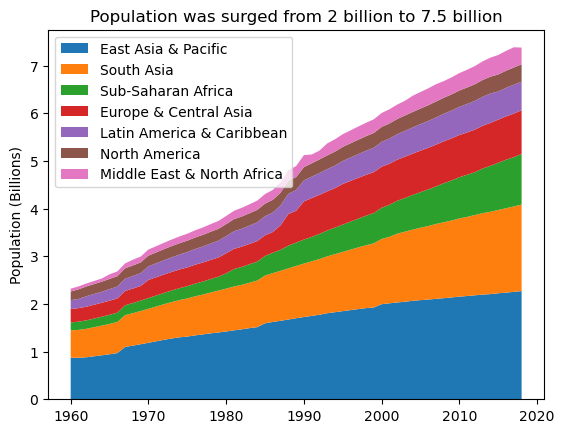

In [20]:
fig, ax = plt.subplots()

ax.stackplot(pop_pivot.index,
             [pop_pivot[region] / 1_000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
             labels=pop_pivot.iloc[-1].sort_values(ascending=False).index
            )


ax.set_title("Population was surged from 2 billion to 7.5 billion")
ax.set_ylabel("Population (Billions)")
ax.legend(loc="upper left")
plt.show()

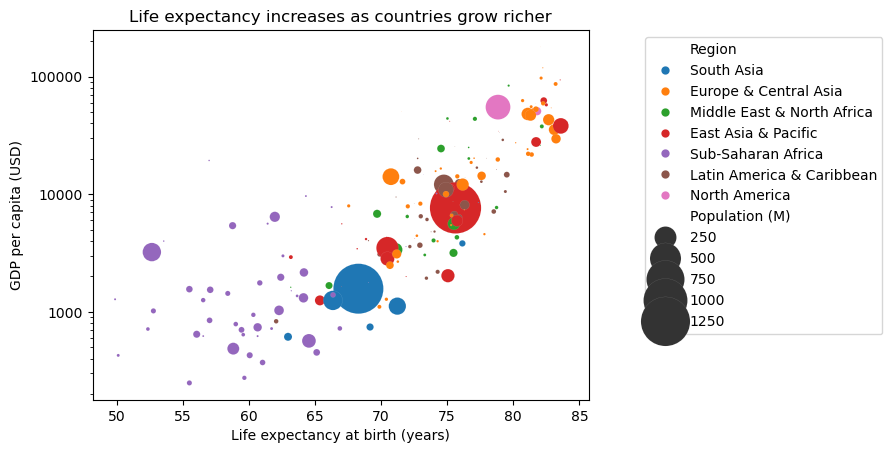

In [21]:
minsize = min(world_bank_hdi_2014["Population (M)"])
maxsize = max(world_bank_hdi_2014["Population (M)"])

fig, ax = plt.subplots()

sns.scatterplot(x="Life expectancy at birth (years)",
                y="GDP per capita (USD)",
                data=world_bank_hdi_2014,
                size="Population (M)",
                sizes=(minsize, maxsize),
                hue="Region",
                ax=ax
               ).set(title="Life expectancy increases as countries grow richer", yscale="log")

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.legend(bbox_to_anchor=(1.1,1))
plt.show()

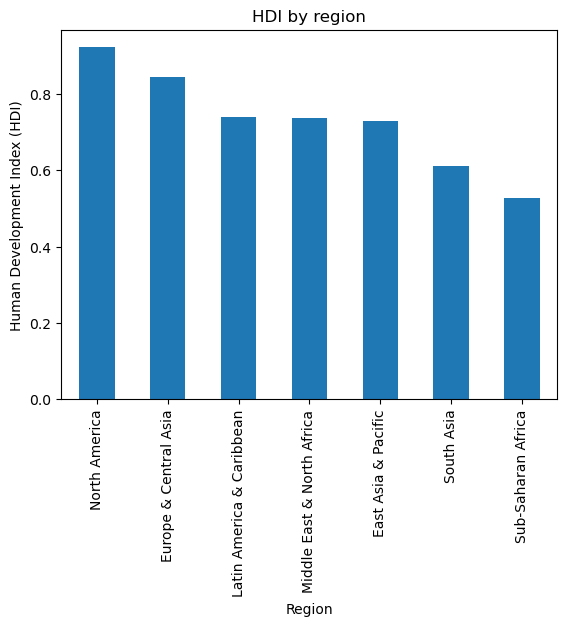

In [22]:
wb_hdi_by_region.plot(kind="bar",
                      title="HDI by region",
                      ylabel="Human Development Index (HDI)",
                      legend=False)
plt.show()

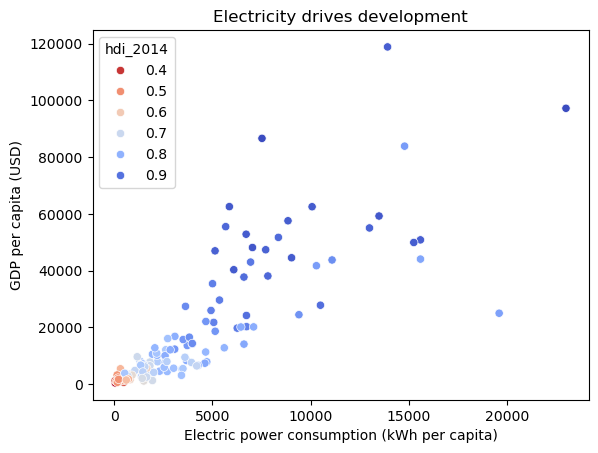

In [23]:
sns.scatterplot(x="Electric power consumption (kWh per capita)",
                y="GDP per capita (USD)",
                data=world_bank_hdi_2014.loc[world_bank_hdi_2014["Country Name"] != "Iceland", :],
                hue="hdi_2014",
                palette="coolwarm_r"
               ).set(title="Electricity drives development")

plt.show()

## Build a final report

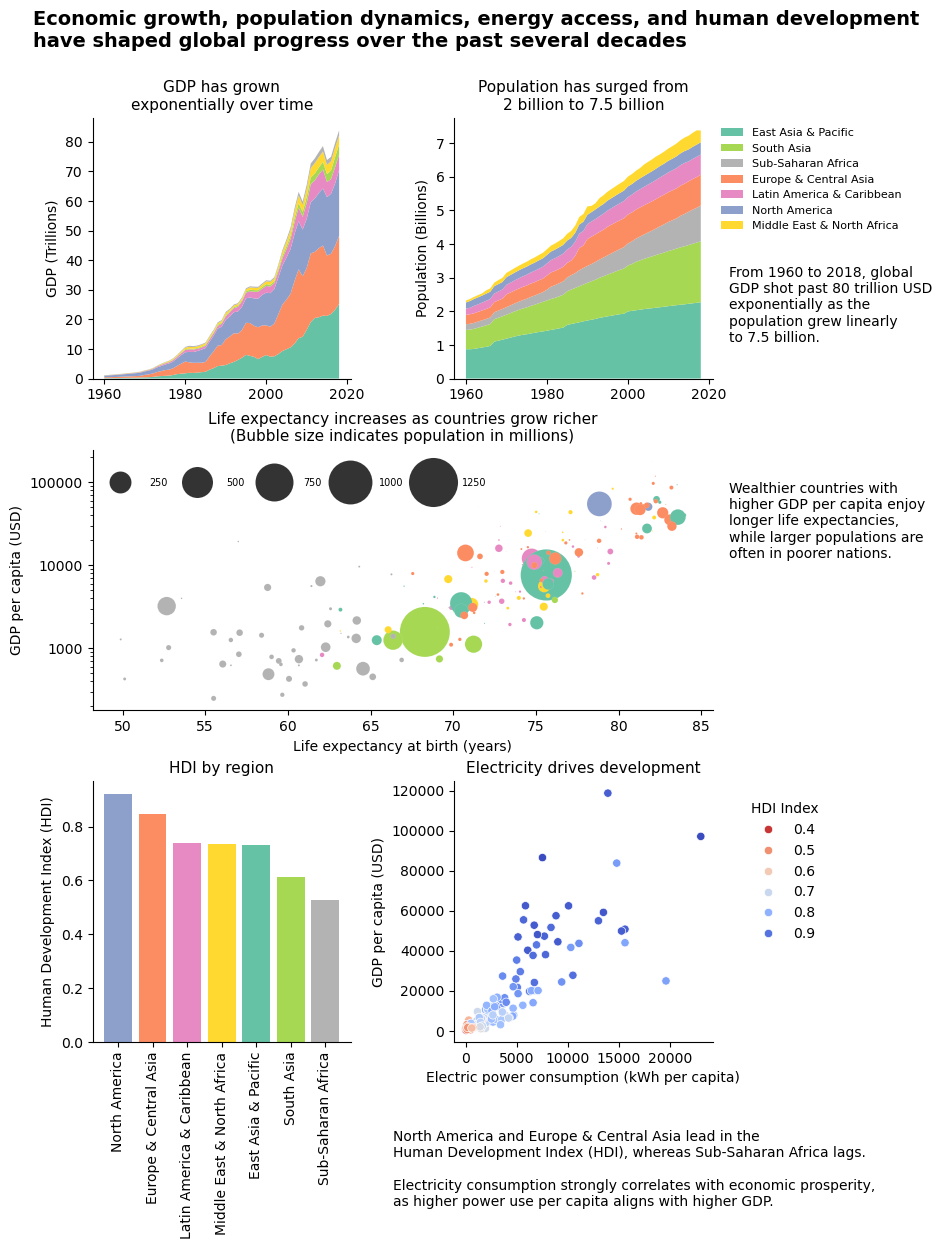

In [25]:
# Color scheme lists to map to development regions
stack1_list = ["#66C2A5", "#fC8D62", "#8DA0CB", "#E78AC3", "#A6D854", "#FFD92F", "#B3B3B3"]
stack2_list = ["#66C2A5", "#A6D854", "#B3B3B3", "#fC8D62", "#E78AC3", "#8DA0CB", "#FFD92F"]
bar_list = ["#8DA0CB", "#fC8D62", "#E78AC3", "#FFD92F", "#66C2A5", "#A6D854", "#B3B3B3"]
bubble_list = ["#A6D854", "#fC8D62", "#FFD92F", "#66C2A5", "#B3B3B3", "#E78AC3", "#8DA0CB"]

# Create figure and grid
fig = plt.figure(figsize=(8, 12))
fig.subplots_adjust(wspace=6, hspace=6)
gs = GridSpec(nrows=12, ncols=6)

# Main graphic title
fig.suptitle(
    "Economic growth, population dynamics, energy access, and human development\nhave shaped global progress over the past several decades",
    fontsize=14,
    fontweight="bold",
    x=0.05,
    y=0.97,
    horizontalalignment="left"
)

##############
### Axis 1 ###
##############
ax1 = fig.add_subplot(gs[0:4, 0:3])

ax1.stackplot(gdp_pivot.index,
             [gdp_pivot[region] / 1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
             labels=gdp_pivot.iloc[-1].sort_values(ascending=False).index,
             colors=stack1_list)

ax1.set_title("GDP has grown\nexponentially over time", fontsize=11)
ax1.set_ylabel("GDP (Trillions)")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

##############
### Axis 2 ###
##############
ax2 = fig.add_subplot(gs[0:4, 3:6])

ax2.stackplot(pop_pivot.index,
             [pop_pivot[region] / 1_000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
             labels=pop_pivot.iloc[-1].sort_values(ascending=False).index,
             colors=stack2_list
            )


ax2.set_title("Population has surged from\n2 billion to 7.5 billion", fontsize=11)
ax2.set_ylabel("Population (Billions)")
ax2.legend(bbox_to_anchor=(1.77, 1), fontsize=8, frameon=False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

##############
### Axis 3 ###
##############
ax3 = fig.add_subplot(gs[4:8, :])

# Min and max for population bubbles
minsize = min(world_bank_hdi_2014["Population (M)"])
maxsize = max(world_bank_hdi_2014["Population (M)"])

sns.scatterplot(x="Life expectancy at birth (years)",
                y="GDP per capita (USD)",
                data=world_bank_hdi_2014,
                size="Population (M)",
                sizes=(minsize, maxsize),
                hue="Region",
                ax=ax3,
                palette=bubble_list
               ).set(yscale="log")

ax3.set_title("Life expectancy increases as countries grow richer\n(Bubble size indicates population in millions)", fontsize=11)
ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

# Legend formatting
handles, labels = ax3.get_legend_handles_labels()
entries_to_skip = len(world_bank_hdi_2014["Region"].unique()) + 2

ax3.legend(
    handles[entries_to_skip:],
    labels[entries_to_skip:],
    bbox_to_anchor=(0.65, 0.82),
    handletextpad=2,
    frameon=False,
    ncols=6,
    fontsize=7
)

##############
### Axis 4 ###
##############
ax4 = fig.add_subplot(gs[8:12, 0:3])

ax4.bar(wb_hdi_by_region.index,
        wb_hdi_by_region["avg_hdi"],
        color=bar_list)

ax4.set_title("HDI by region", fontsize=11)
ax4.set_ylabel("Human Development Index (HDI)")
ax4.set_xticks(ax4.get_xticks())
ax4.set_xticklabels(wb_hdi_by_region.index, rotation=90)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

##############
### Axis 5 ###
##############
ax5 = fig.add_subplot(gs[8:12, 3:6])

sns.scatterplot(x="Electric power consumption (kWh per capita)",
                y="GDP per capita (USD)",
                data=world_bank_hdi_2014.loc[world_bank_hdi_2014["Country Name"] != "Iceland", :],
                hue="hdi_2014",
                palette="coolwarm_r",
                ax=ax5,
               )

ax5.set_title("Electricity drives development", fontsize=11)
ax5.legend(bbox_to_anchor=(1.1, 0.97), title="HDI Index", frameon=False)
ax5.spines["top"].set_visible(False)
ax5.spines["right"].set_visible(False)

# Text summary
text_summary_1 = '''
From 1960 to 2018, global
GDP shot past 80 trillion USD
exponentially as the 
population grew linearly
to 7.5 billion.
'''

text_summary_2 = '''
Wealthier countries with
higher GDP per capita enjoy
longer life expectancies,
while larger populations are
often in poorer nations.
'''

text_summary_3= '''
North America and Europe & Central Asia lead in the
Human Development Index (HDI), whereas Sub-Saharan Africa lags.

Electricity consumption strongly correlates with economic prosperity,
as higher power use per capita aligns with higher GDP.
'''

fig.text(0.92, 0.68, text_summary_1)
fig.text(0.92, 0.50, text_summary_2)
fig.text(0.50, -0.04, text_summary_3)

# Enough already!
plt.savefig("econ_development_report.png", bbox_inches="tight")
plt.show()